Code written by Cindy Liu(1) and Dr. Martin Ross(2) <br>
(1) Coop student, Physics & Astronomy <br>
(2) Associate Professor, Earth and Environmental Sciences
University of Waterloo, Canada

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
# loading data
#The default structure is samples (rows) and frequencies (cols) from coarse (left) to fine (right)
#Rename file and adjust the skiprows and column range as needed

allFreq = np.loadtxt("North_Eye_Samples.txt", skiprows=2, 
                     usecols=np.arange(23,95)).transpose()

grainSizesData = np.loadtxt('North_Eye_Samples.txt', skiprows = 1,
                            usecols=np.arange(22, 94), dtype='str')[0]

# grain size labels
grainSizes = []

for i in grainSizesData[:-1]:
    grainSizes.append(i)
grainSizes.append('<0.19')

# sample labels
allLabels = np.loadtxt("North_Eye_Samples.txt", skiprows=2, usecols=0, dtype='str')

In [3]:
allLabels.shape

(7,)

In [4]:
# function for cumulative curve values
def cumulative(allSamples, start, end):
    
    # inputs: (list of lists, int, int)
    
    sampleCumulative = [[]] * (end-start)
    
    for i in range(start,end):
        sampleCumulative[i-start] = allSamples[:,i]
        sampleCumulative[i-start] = np.cumsum(sampleCumulative[i-start])
        
    return sampleCumulative

# function for cumulative curves
def cumulativeCurve(allSamples, start, end, xSize, ySize):
    '''
    inputs: (list of lists, int, int, int, int)
    '''
    cumulativeVals = cumulative(allSamples, start, end)
    
    for i in range(len(cumulativeVals)):
        if (i % 2) == 0:
            colour = '#465775'
        else:
            colour = '#ef6f6c'
        fig, ax = plt.subplots(1, 1, figsize=(xSize, ySize))
        plt.plot(range(len(grainSizes)), cumulativeVals[i], 
                 color=colour, linewidth=2.5, marker='o')
        
        # Set custom x-tick positions (every other tick)
        num_ticks = len(phiVals)
        tick_positions = np.arange(0, num_ticks, step=2)
        plt.xticks(tick_positions, labels=phiVals[::2], fontsize=12)
        
        plt.ylim((-0.5, 105))
        ax.set_xlabel('phi', fontsize=14)
        ax.set_ylabel('Cumulative Frequency %', fontsize=14)
        ax.tick_params(axis='y', labelsize=14)
        ax.set_title('Cumulative Frequency of Sample ' + str(allLabels[start + i]), 
                     pad=20, fontsize=18)
        plt.show()

# Example usage:
# cumulativeCurve(allSamples, start, end, xSize, ySize)


In [5]:
# calculating phi values
grainSizesFloat = []

for i in grainSizes[:-1]:
    grainSizesFloat.append(float(i))

phiVals = []

for i in grainSizesFloat:
    phi = -float(round(math.log(i/1000,2), 2))
    if phi == -0.0:
        phi = 0.0
    phiVals.append(phi)
phiVals.append(14)

print(phiVals)

[2.28, 2.43, 2.57, 2.71, 2.86, 3.0, 3.14, 3.29, 3.43, 3.57, 3.72, 3.86, 4.0, 4.15, 4.29, 4.43, 4.58, 4.72, 4.86, 5.01, 5.15, 5.29, 5.44, 5.58, 5.72, 5.87, 6.01, 6.15, 6.3, 6.44, 6.58, 6.73, 6.87, 7.01, 7.16, 7.3, 7.44, 7.59, 7.73, 7.87, 8.02, 8.16, 8.31, 8.45, 8.59, 8.73, 8.87, 9.02, 9.17, 9.31, 9.45, 9.6, 9.74, 9.88, 10.02, 10.17, 10.31, 10.46, 10.59, 10.75, 10.88, 11.02, 11.18, 11.32, 11.44, 11.61, 11.75, 11.91, 12.02, 12.15, 12.29, 14]


In [6]:
# functions for relative verbal representations of skew and standard deviation
def verbalSkew(skewVal):
    if skewVal > 0.3:
        skewText = "Strongly fine-skewed"
    elif skewVal >= 0.1:
        skewText = "Fine skewed" 
    elif skewVal >= -0.1:
        skewText = "Near symmetrical"
    elif skewVal >=-0.3:
        skewText = "Coarse skewed"
    else:
        skewText = "Strongly coarse skewed"
    return skewText

def verbalStdev(stdev):
    if stdev >4.00:
        stdevText = "Extremely poorly sorted"
    elif stdev >=2.0:
        stdevText = "Very poorly sorted"
    elif stdev >=1.00:
        stdevText = "Poorly sorted"
    elif stdev >=0.71:
        stdevText = "Moderately sorted"
    elif stdev >=0.50:
        stdevText = "Moderately well sorted"
    elif stdev >=0.35:
        stdevText = "Well sorted"
    else:
        stdevText = "Very well sorted"  
    return stdevText

In [7]:
# function for skewness, mean, and stdev
def skewMeanStdev(cumulativeVals):
    
    # inputs: (list)
    
    skews = []
    means = []
    stdevs = []
    
    for i in range(len(cumulativeVals)):
        phi5p = np.interp(5, cumulativeVals[i], phiVals).round(2)
        phi16p = np.interp(16, cumulativeVals[i], phiVals).round(2)
        phi50p = np.interp(50, cumulativeVals[i], phiVals).round(2)
        phi84p = np.interp(84, cumulativeVals[i], phiVals).round(2)
        phi95p = np.interp(95, cumulativeVals[i], phiVals).round(2)
        
        skew = ((phi84p+phi16p-(2*phi50p))/(2*(phi84p-phi16p)))
        + ((phi95p+phi5p-(2*phi50p))/(2*(phi95p-phi5p)))
        mean = (phi16p+phi50p+phi84p)/3
        stdev = ((phi84p-phi16p)/4) + ((phi95p-phi5p)/6.6)
        
        skews.append(skew)
        means.append(mean)
        stdevs.append(stdev)
        
    return [skews, means, stdevs]  

In [8]:
# call the cumulative function to get cumulative values
my_cumulative_vals = cumulative(allFreq, 0, 7)

# call the skewMeanStdev function to obtain skewness, mean, and stdev
skewness, mean, stdev = skewMeanStdev(my_cumulative_vals)

# print the outputs
print("Skewness:", skewness)
print("Mean:", mean)
print("Standard Deviation:", stdev)

Skewness: [0.34293193717277487, 0.2773584905660379, 0.048812664907651626, 0.0854271356783917, 0.0826086956521739, 0.10259179265658759, 0.16066066066066043]
Mean: [4.473333333333334, 6.28, 7.663333333333334, 7.266666666666666, 6.933333333333333, 6.8566666666666665, 6.756666666666667]
Standard Deviation: [1.9459090909090913, 1.445833333333333, 1.765681818181818, 1.8556060606060605, 2.131818181818182, 2.140833333333333, 1.6521969696969698]


In [9]:
# define the input variables
allSamples = allFreq
start = 0
end = 7

# call the cumulative and skewMeanStdev functions to obtain the outputs
my_cumulative_vals = cumulative(allSamples, start, end)
skewness, mean, stdevs = skewMeanStdev(my_cumulative_vals)


# create a dataframe from the output
df = pd.DataFrame({'Sample ID': allLabels, 'Mean': mean, 'Skewness': skewness, 'Stdev': stdev})

# print the dataframe
print(df)


             Sample ID      Mean  Skewness     Stdev
0             NE22T1C2  4.473333  0.342932  1.945909
1             NE22T1C3  6.280000  0.277358  1.445833
2      NE22T1C5-Unit13  7.663333  0.048813  1.765682
3      NE22T1C5-Unit14  7.266667  0.085427  1.855606
4  NE22T1C6-Unit10A-T1  6.933333  0.082609  2.131818
5  NE22T1C6-Unit10A-T3  6.856667  0.102592  2.140833
6             NE22T1C6  6.756667  0.160661  1.652197


In [10]:
def createDataFrame(allSamples, allLabels, start, end):
    cumulativeVals = cumulative(allSamples, start, end)
    statsVals = skewMeanStdev(cumulativeVals)
    skews = statsVals[0]
    means = statsVals[1]
    stdevs = statsVals[2]

    df = pd.DataFrame({'Sample ID': allLabels[start:end], 
                       'Mean': means, 
                       'Skewness': skews, 
                       'Standard Deviation': stdevs})
    
    # add verbal skewness and standard deviation columns
    df['Verbal Skewness'] = df['Skewness'].apply(verbalSkew)
    df['Verbal Stdev'] = df['Standard Deviation'].apply(verbalStdev)
    
    return df

In [11]:
createDataFrame(allFreq,allLabels, 0, 7)

,Sample ID,Mean,Skewness,Standard Deviation,Verbal Skewness,Verbal Stdev
0,NE22T1C2,4.473333,0.342932,1.945909,Strongly fine-skewed,Poorly sorted
1,NE22T1C3,6.280000,0.277358,1.445833,Fine skewed,Poorly sorted
2,NE22T1C5-Unit13,7.663333,0.048813,1.765682,Near symmetrical,Poorly sorted
3,NE22T1C5-Unit14,7.266667,0.085427,1.855606,Near symmetrical,Poorly sorted
4,NE22T1C6-Unit10A-T1,6.933333,0.082609,2.131818,Near symmetrical,Very poorly sorted
5,NE22T1C6-Unit10A-T3,6.856667,0.102592,2.140833,Fine skewed,Very poorly sorted
6,NE22T1C6,6.756667,0.160661,1.652197,Fine skewed,Poorly sorted


In [12]:
# function to generate frequency distribution graphs 
def wtHist(allSamples, start, end, xSize, ySize):
    '''
    inputs: (list of lists, int, int, list of 
            lists, int, int)
    start > end
    '''
    adjust = start
    if start > 5:
        adjust -= 1
    
    specifiedSamples = [[]] * (end - start)
    for i in range(start, end):
        specifiedSamples[i - start] = allSamples[:, i]
    
    sampleCount = start
    
    for i in specifiedSamples:
        if (sampleCount % 2) == 0:
            colour = '#4464ad'
        else:
            colour = '#a4b0f5'
        fig, ax = plt.subplots(1, 1, figsize=(xSize, ySize))
        ax.bar(np.arange(len(i)), i, color=colour, alpha=0.8)
        #ax.plot(np.arange(len(i)), i, color='#f58f29', marker='o', linewidth=0)
        
        # Set custom x-tick positions (every other tick)
        num_ticks = len(grainSizes)
        tick_positions = np.arange(0, num_ticks, step=2) + 0.5
        plt.xticks(tick_positions, labels=grainSizes[::2])
        
        ax.set_xlabel('Grain Size (µm)', fontsize=14)
        ax.set_ylabel('Frequency (%)', fontsize=14)
        ax.tick_params(axis='y', labelsize=14)
        ax.set_title('Frequency Distribution of Sample ' + str(allLabels[sampleCount]),
                     pad=20, fontsize=18)
        plt.show()
        sampleCount += 1

# Example usage:
# wtHist(allSamples, start, end, xSize, ySize)

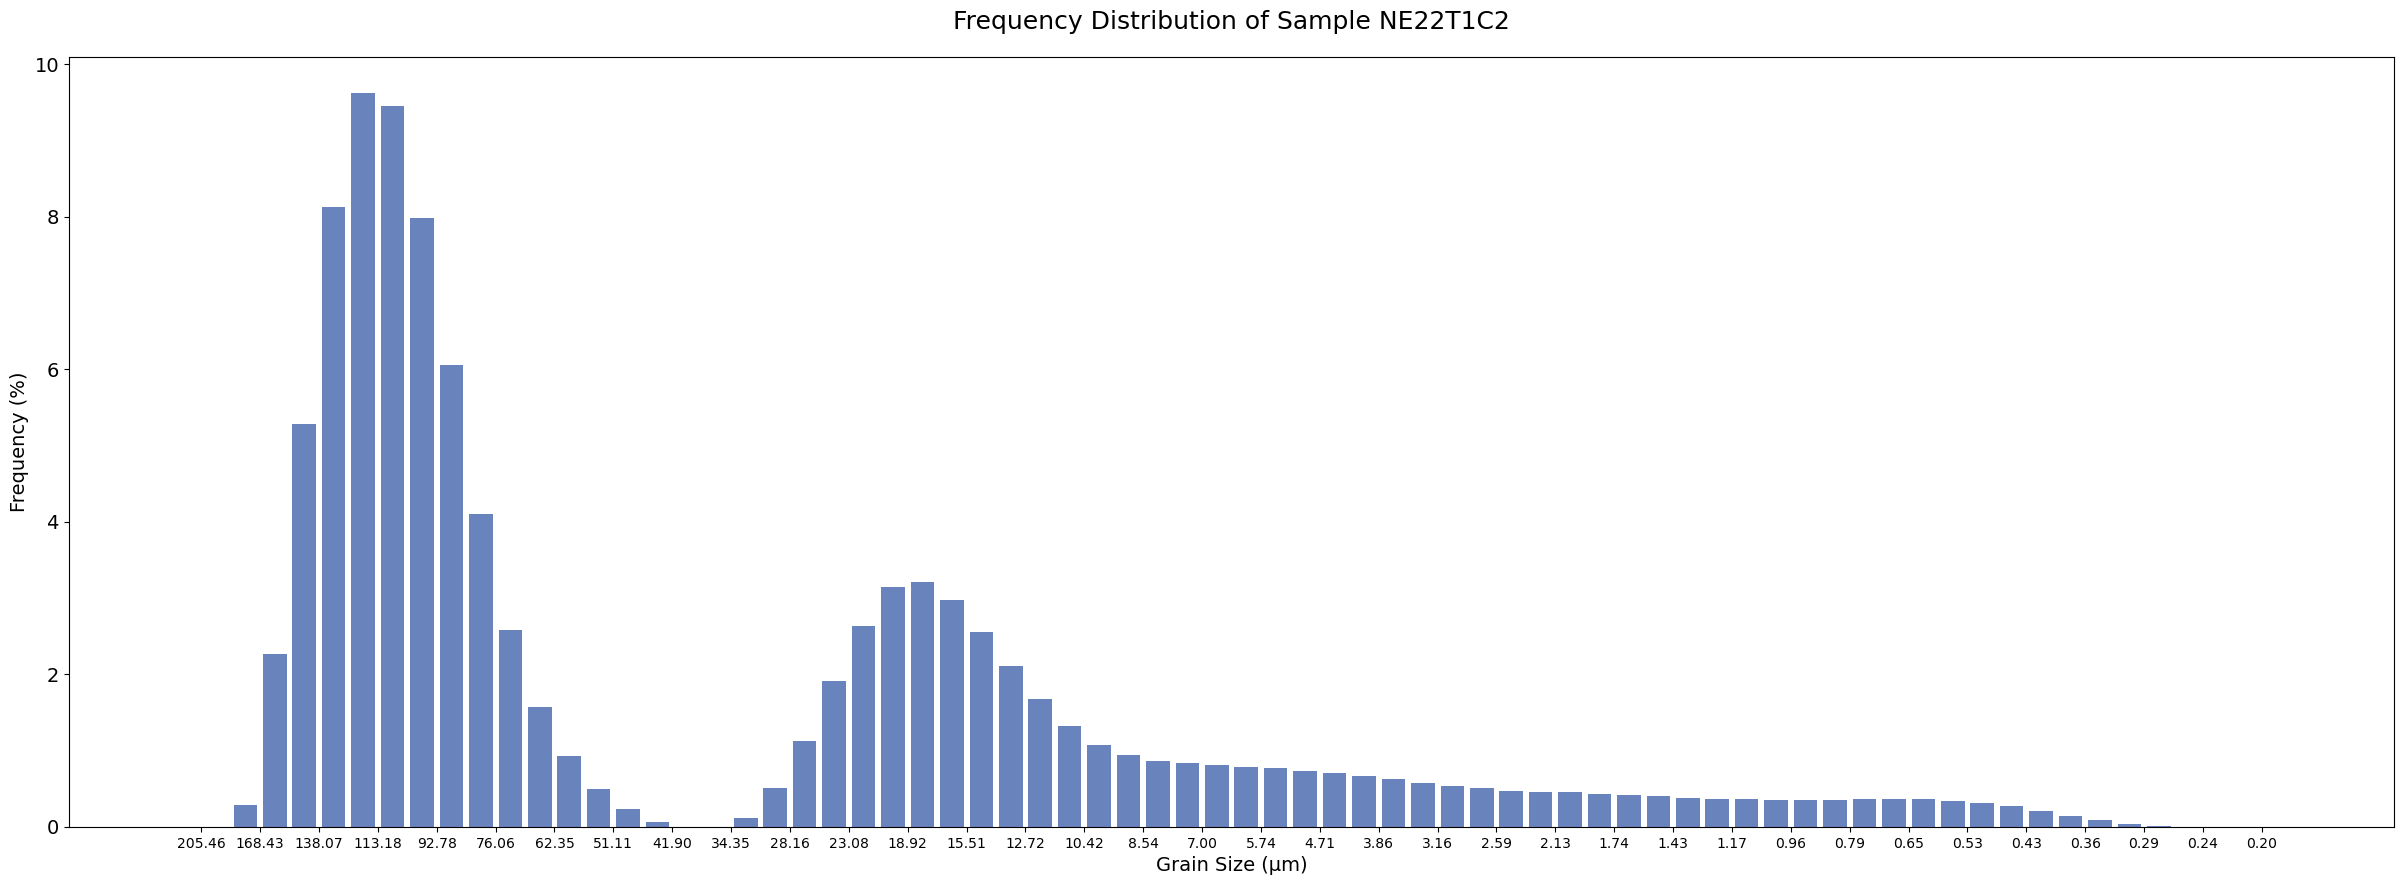

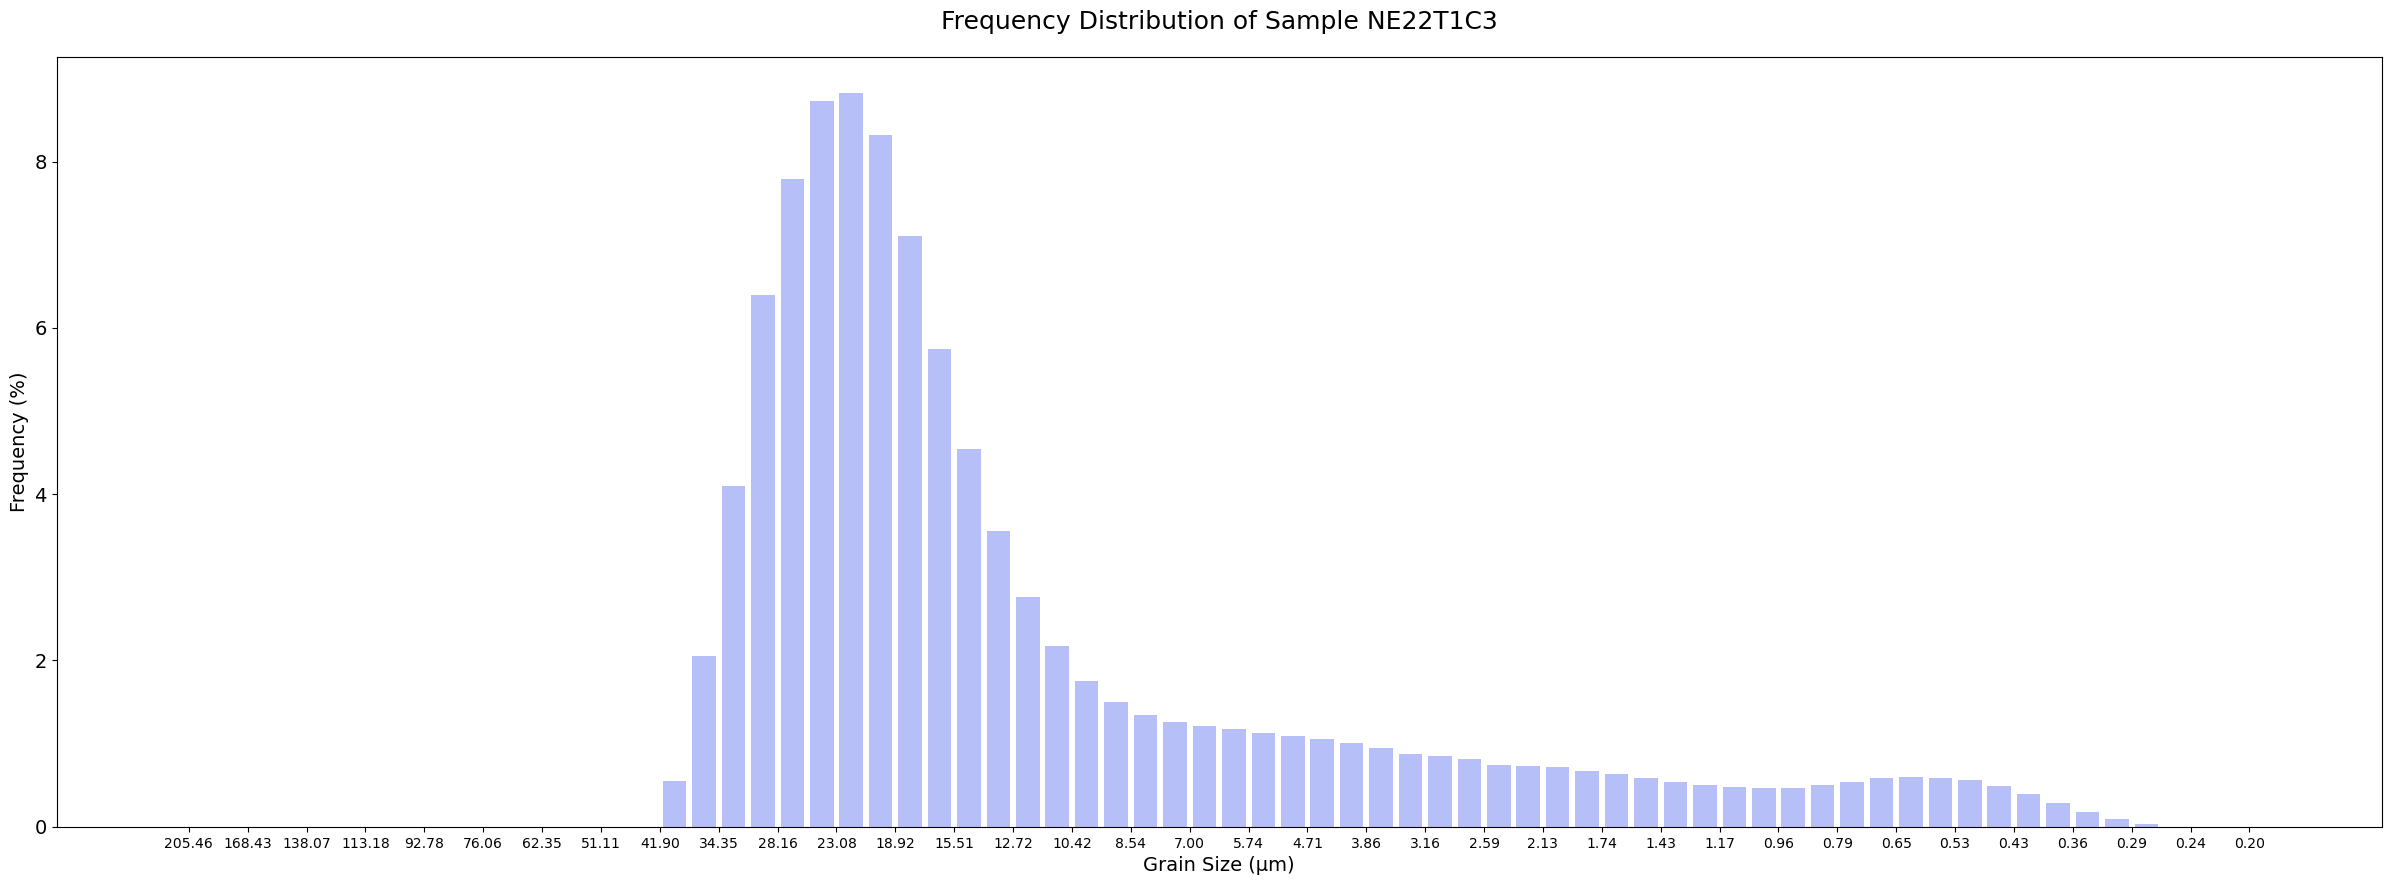

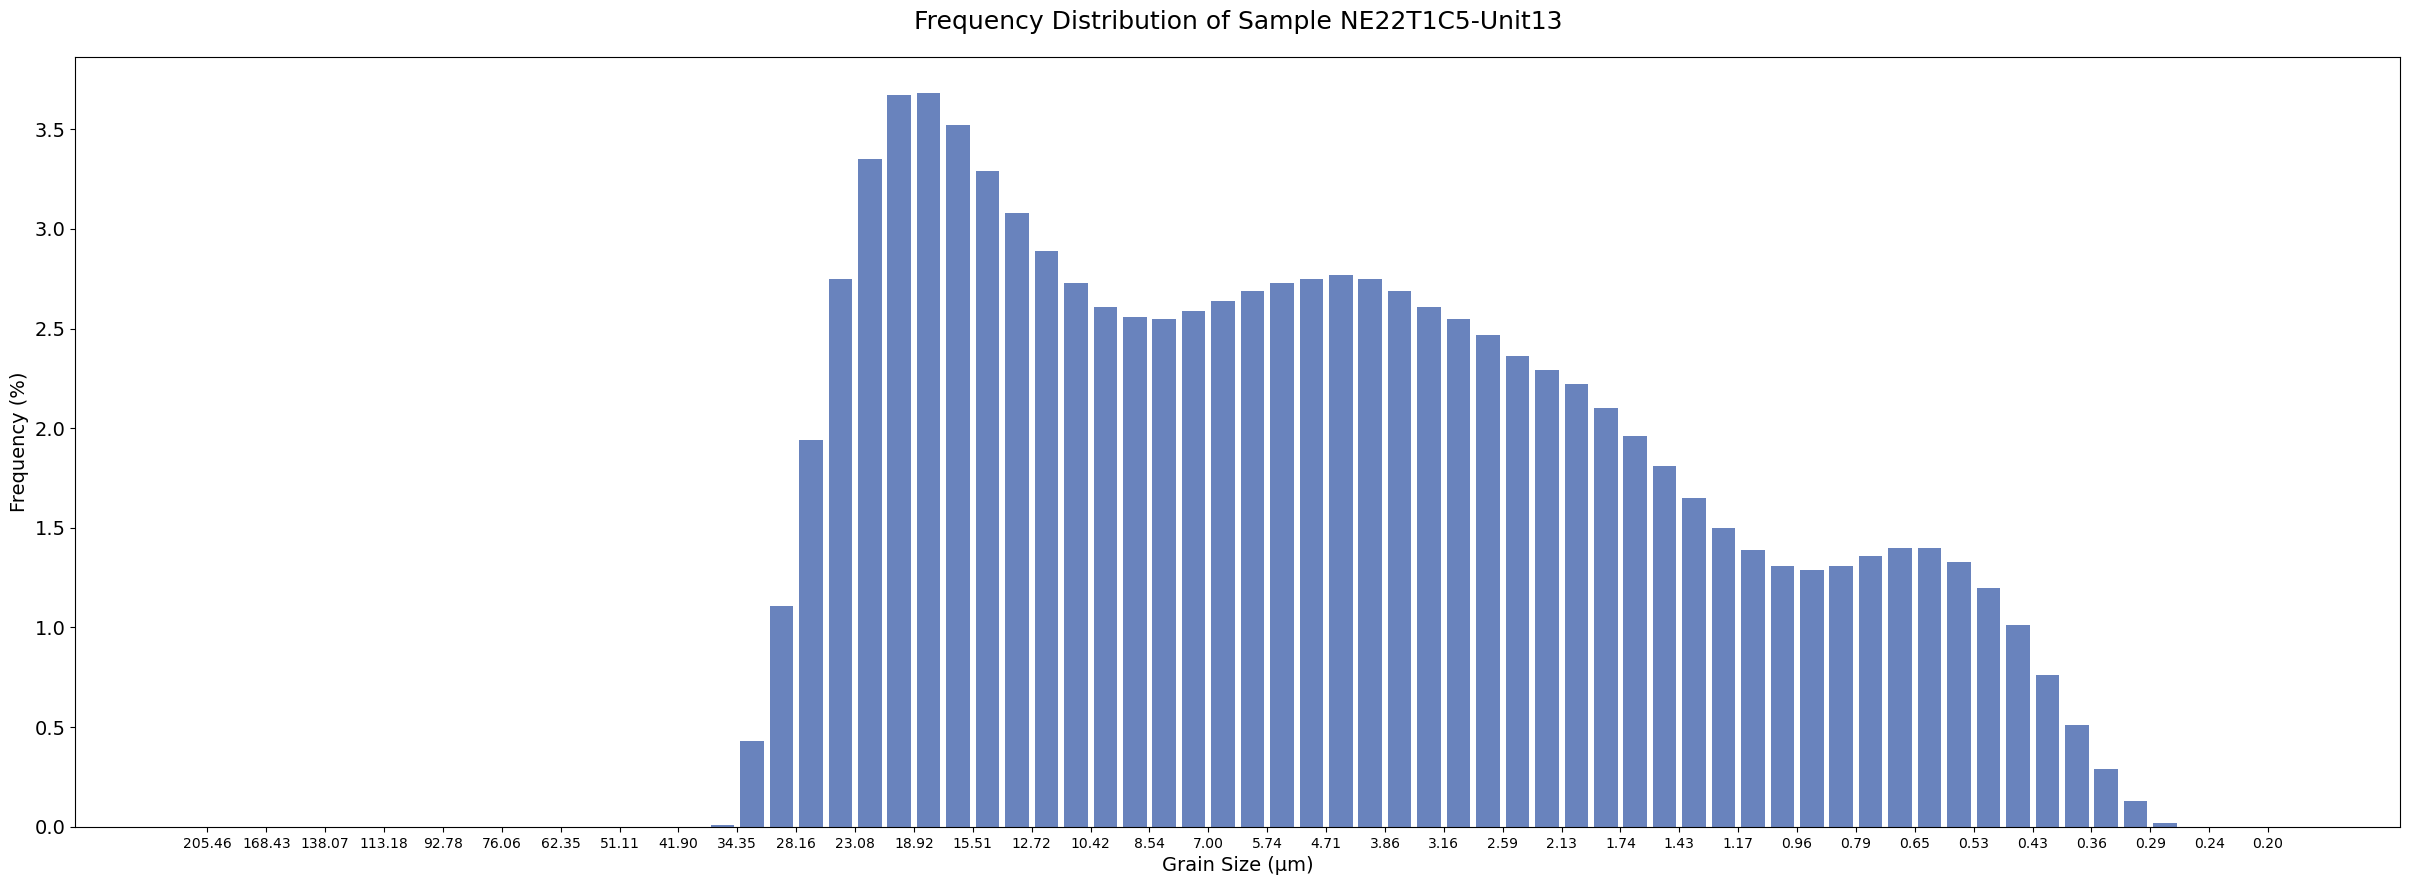

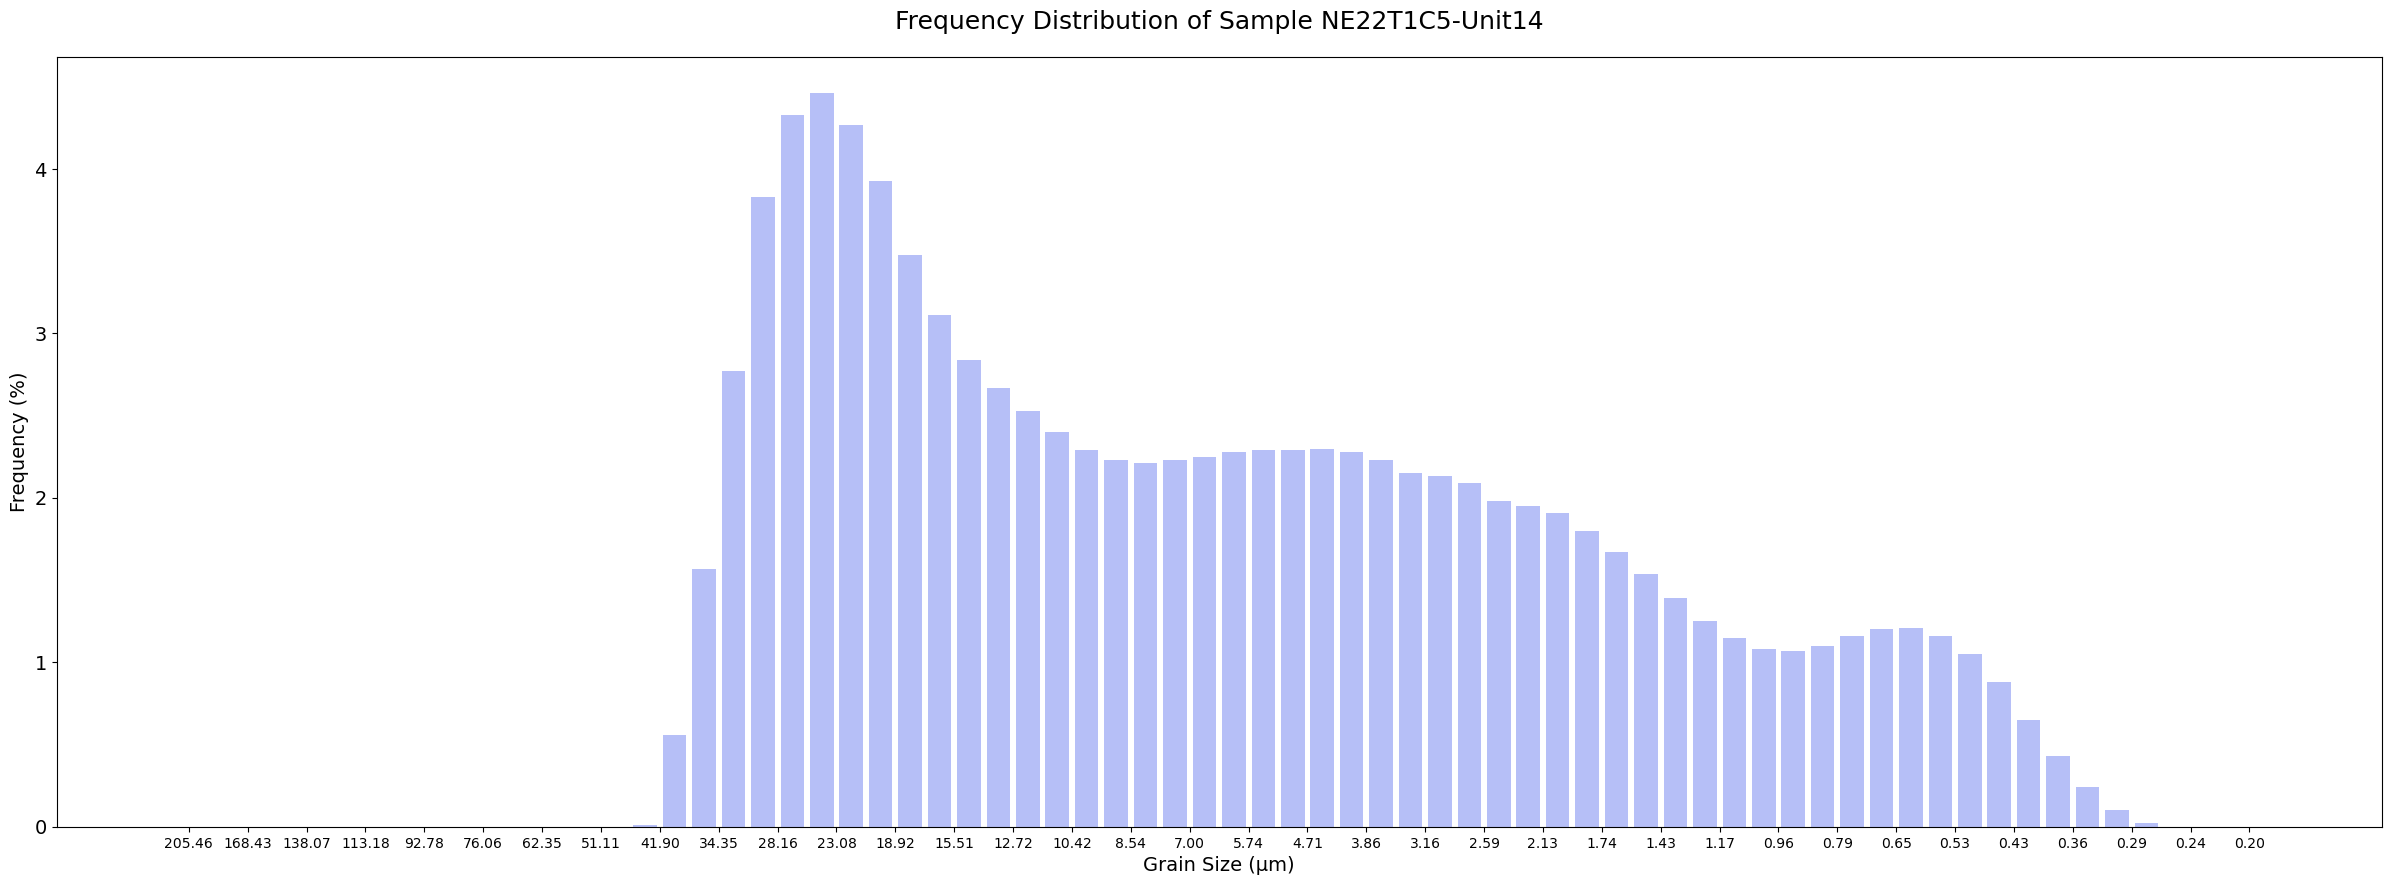

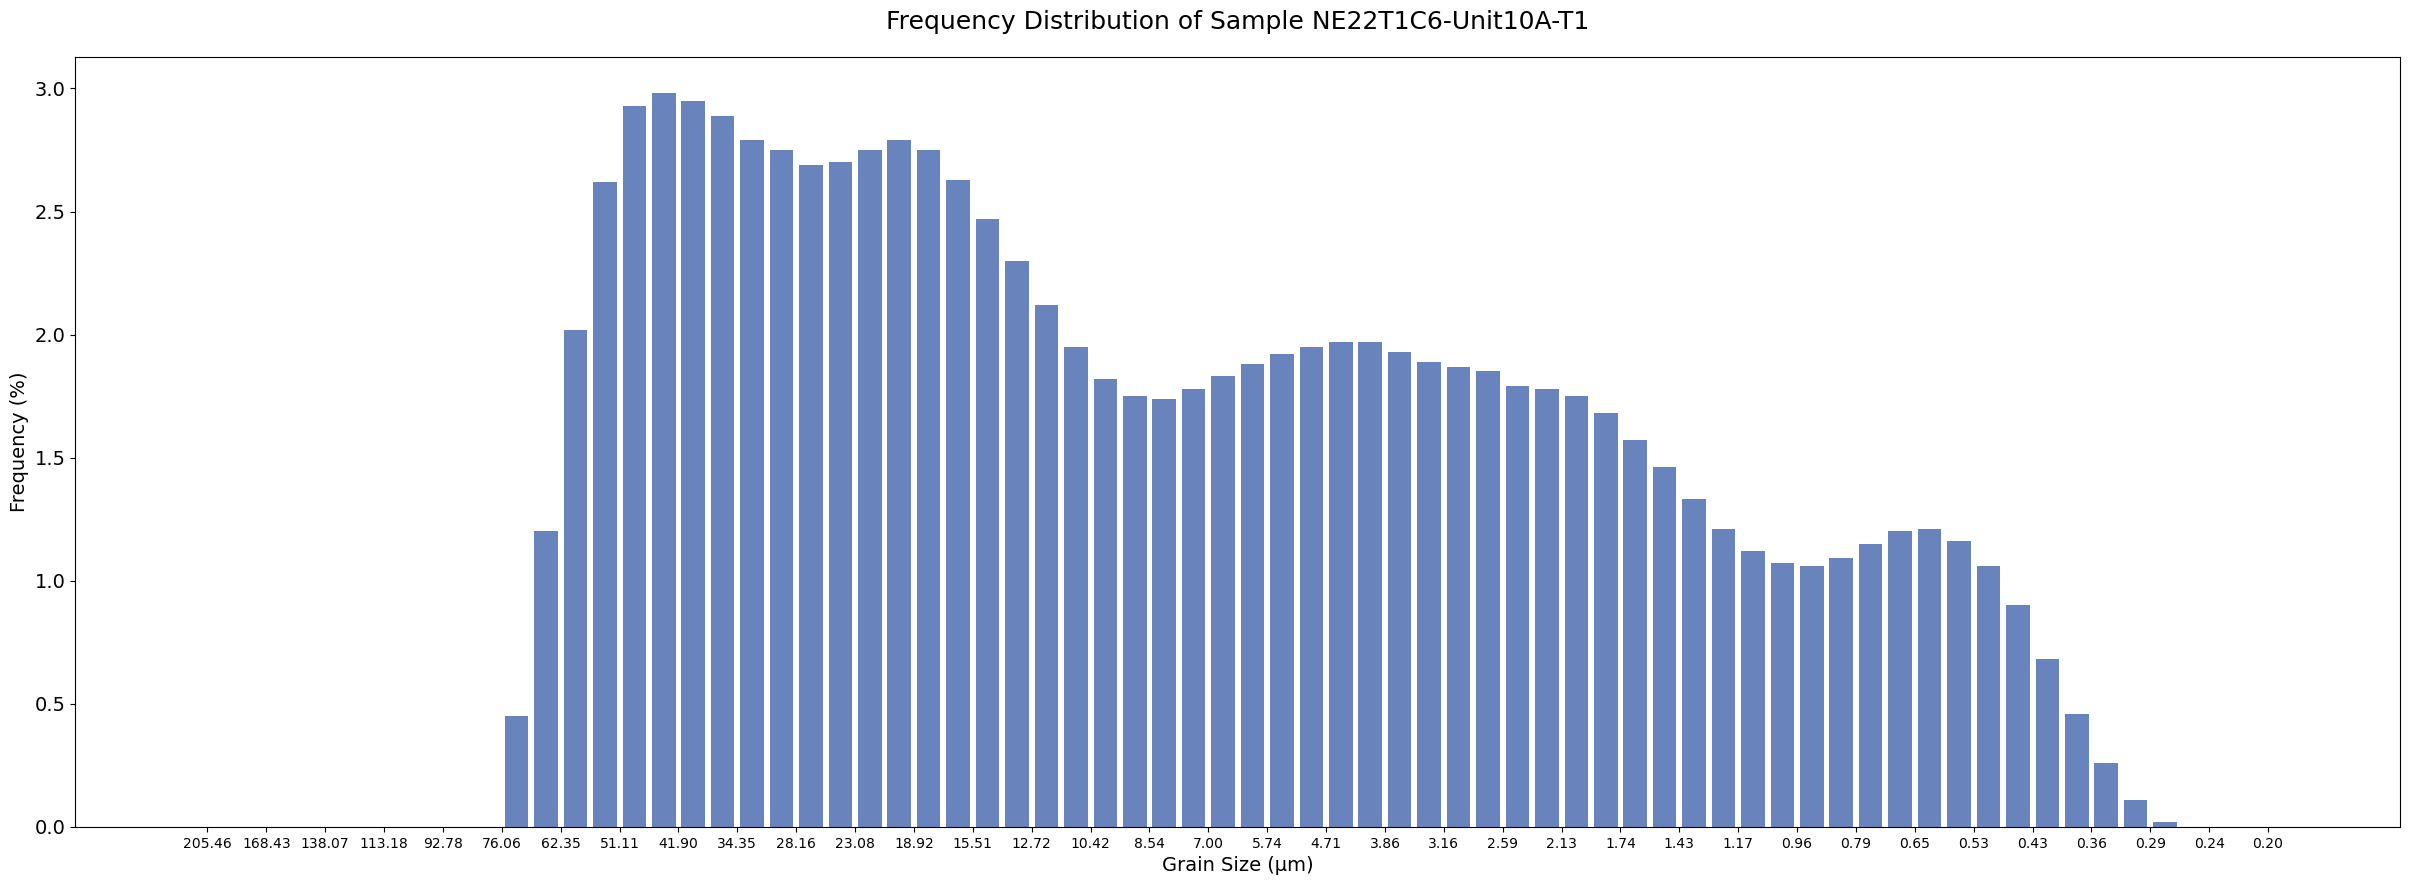

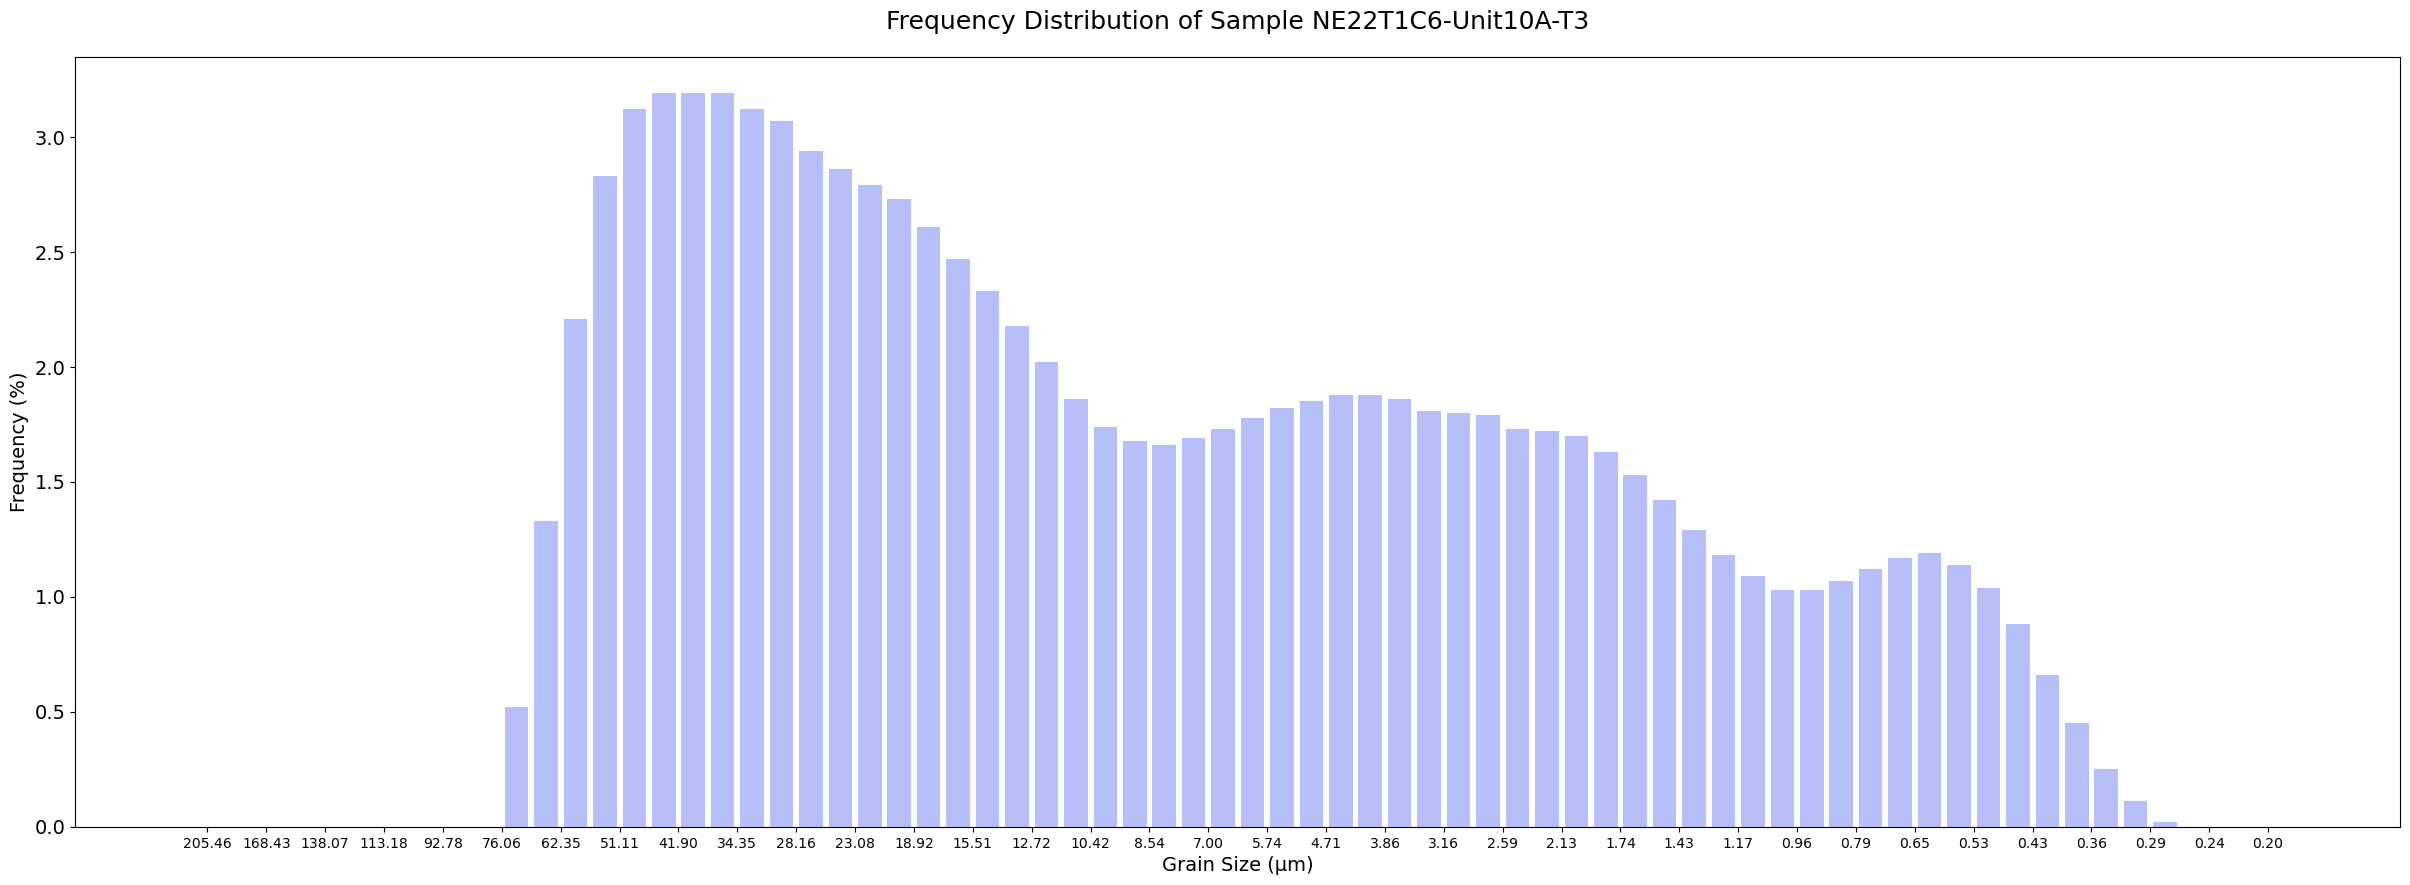

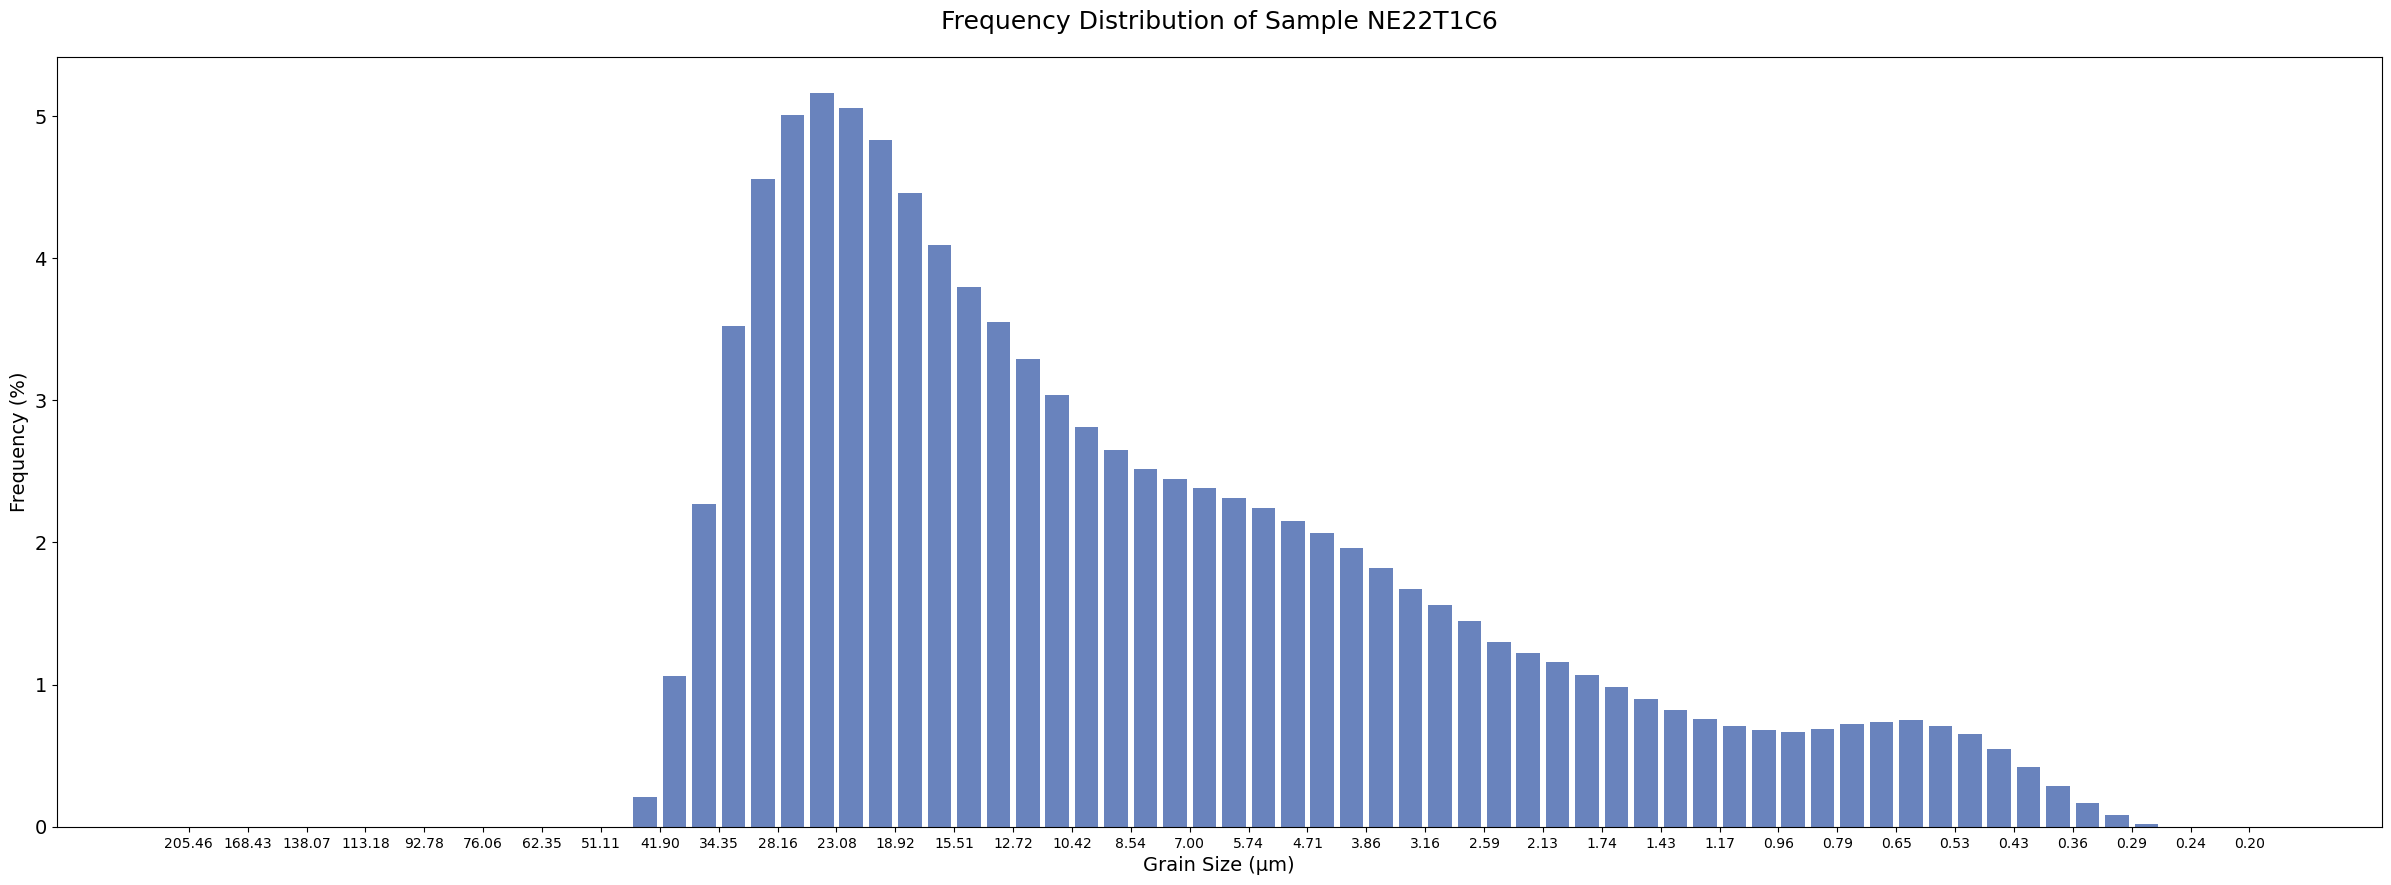

In [13]:
# frequency distribution of samples 1-7
wtHist(allFreq,0,7, 30,10)


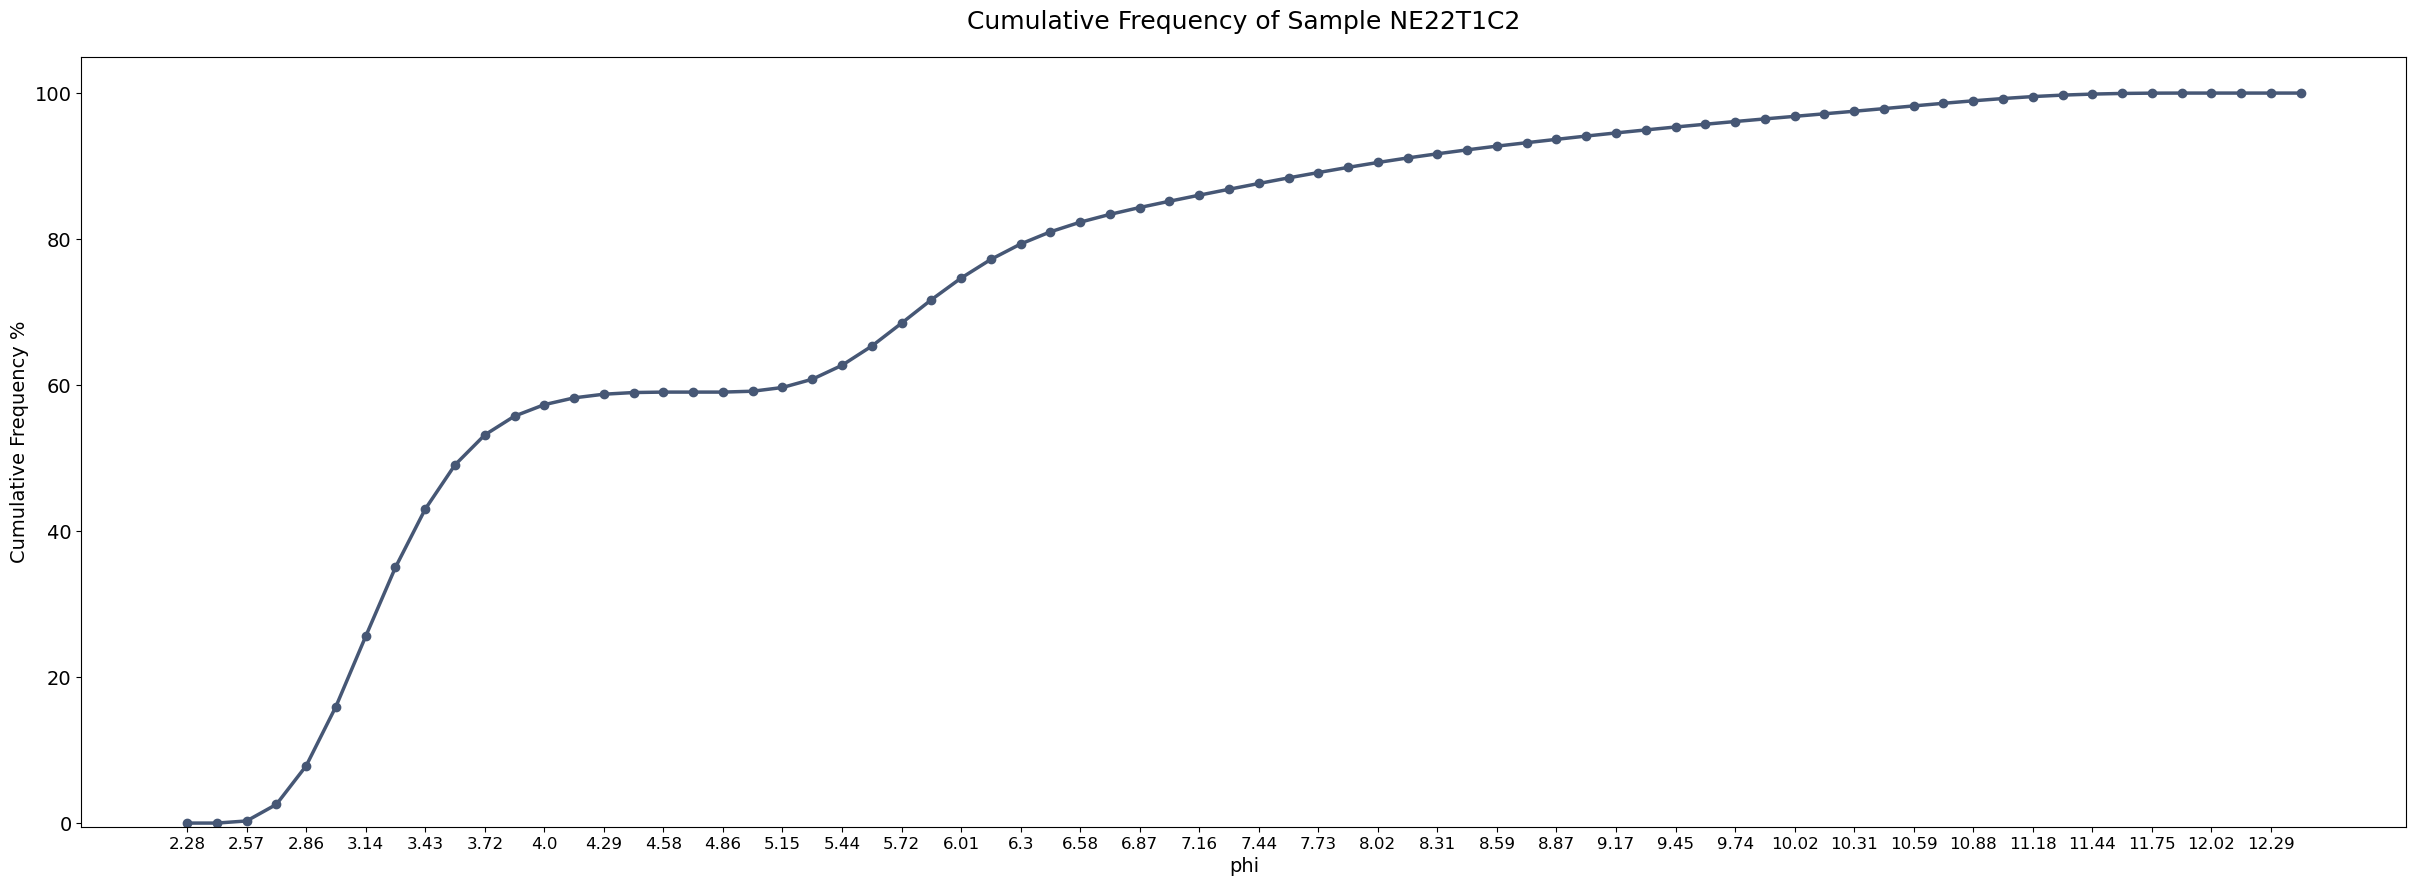

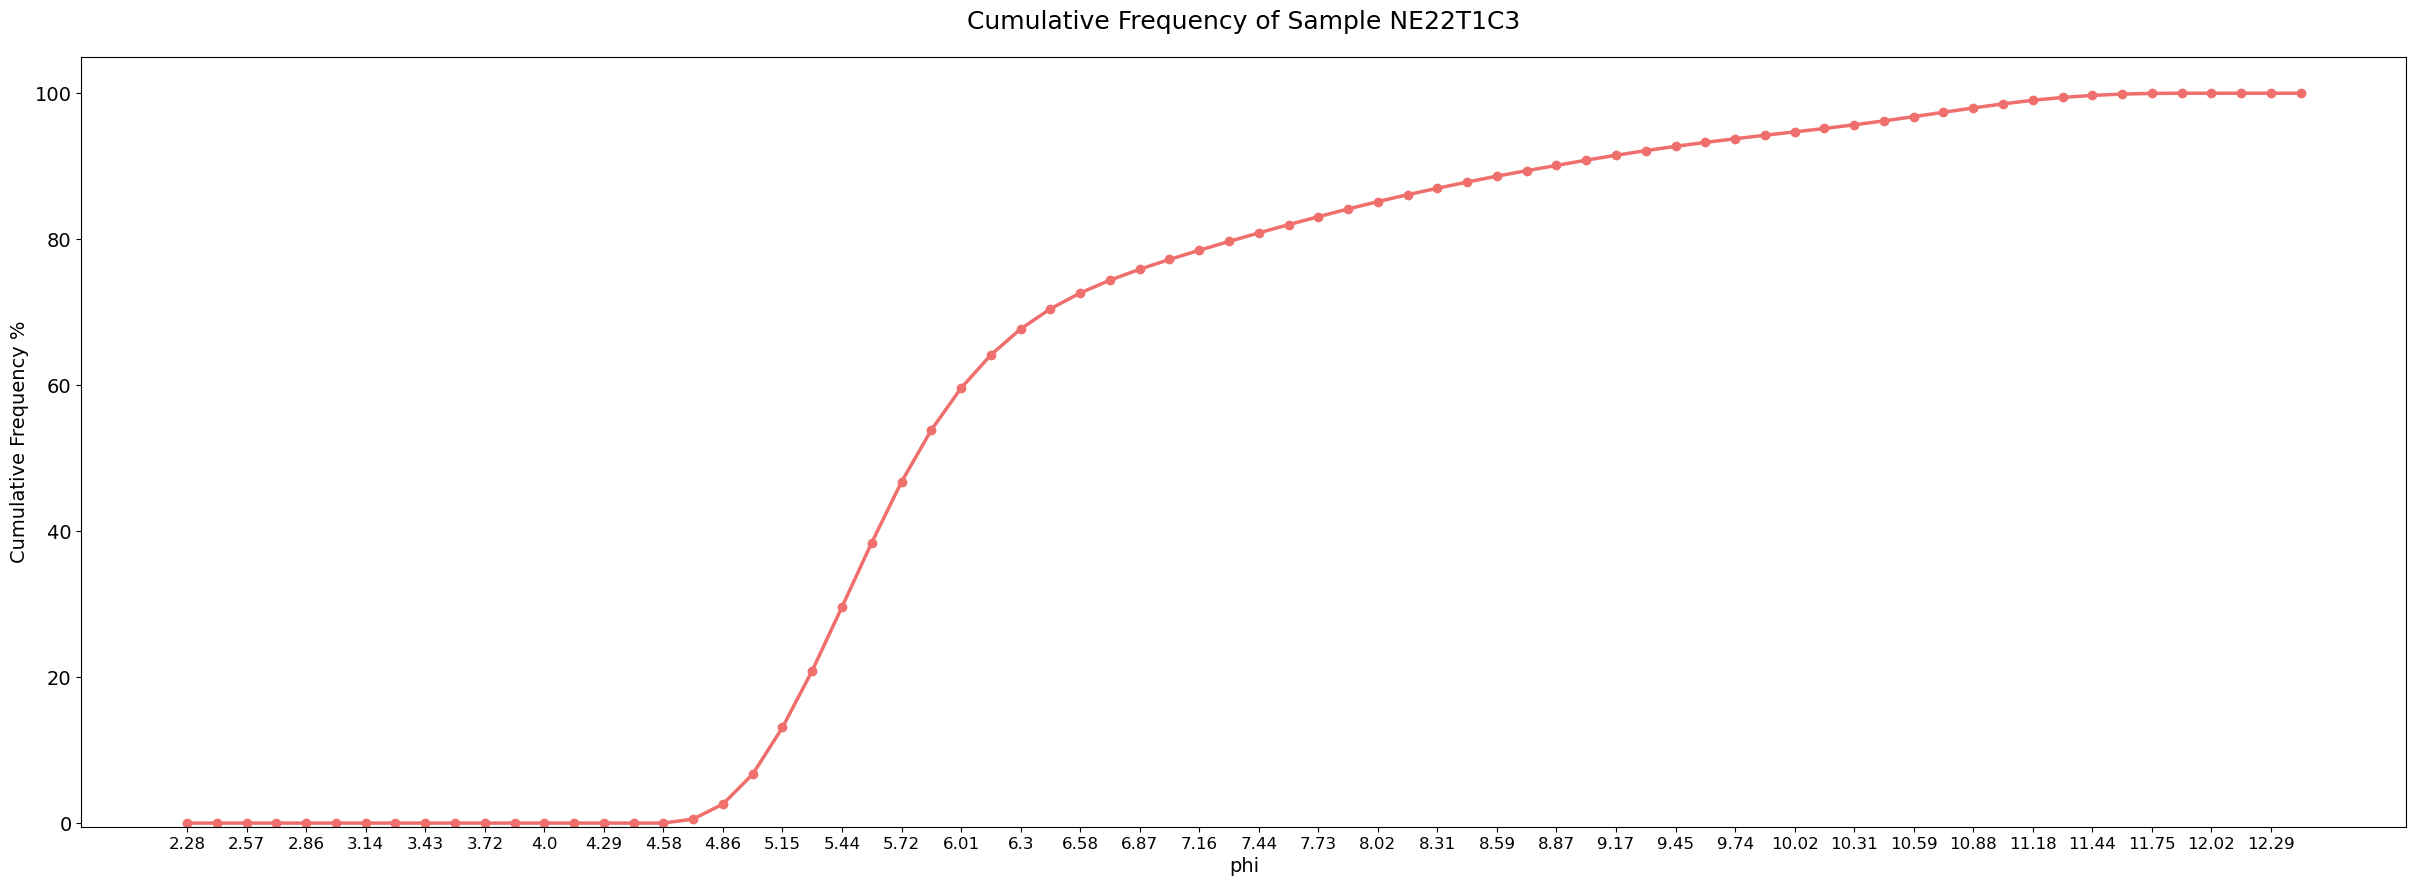

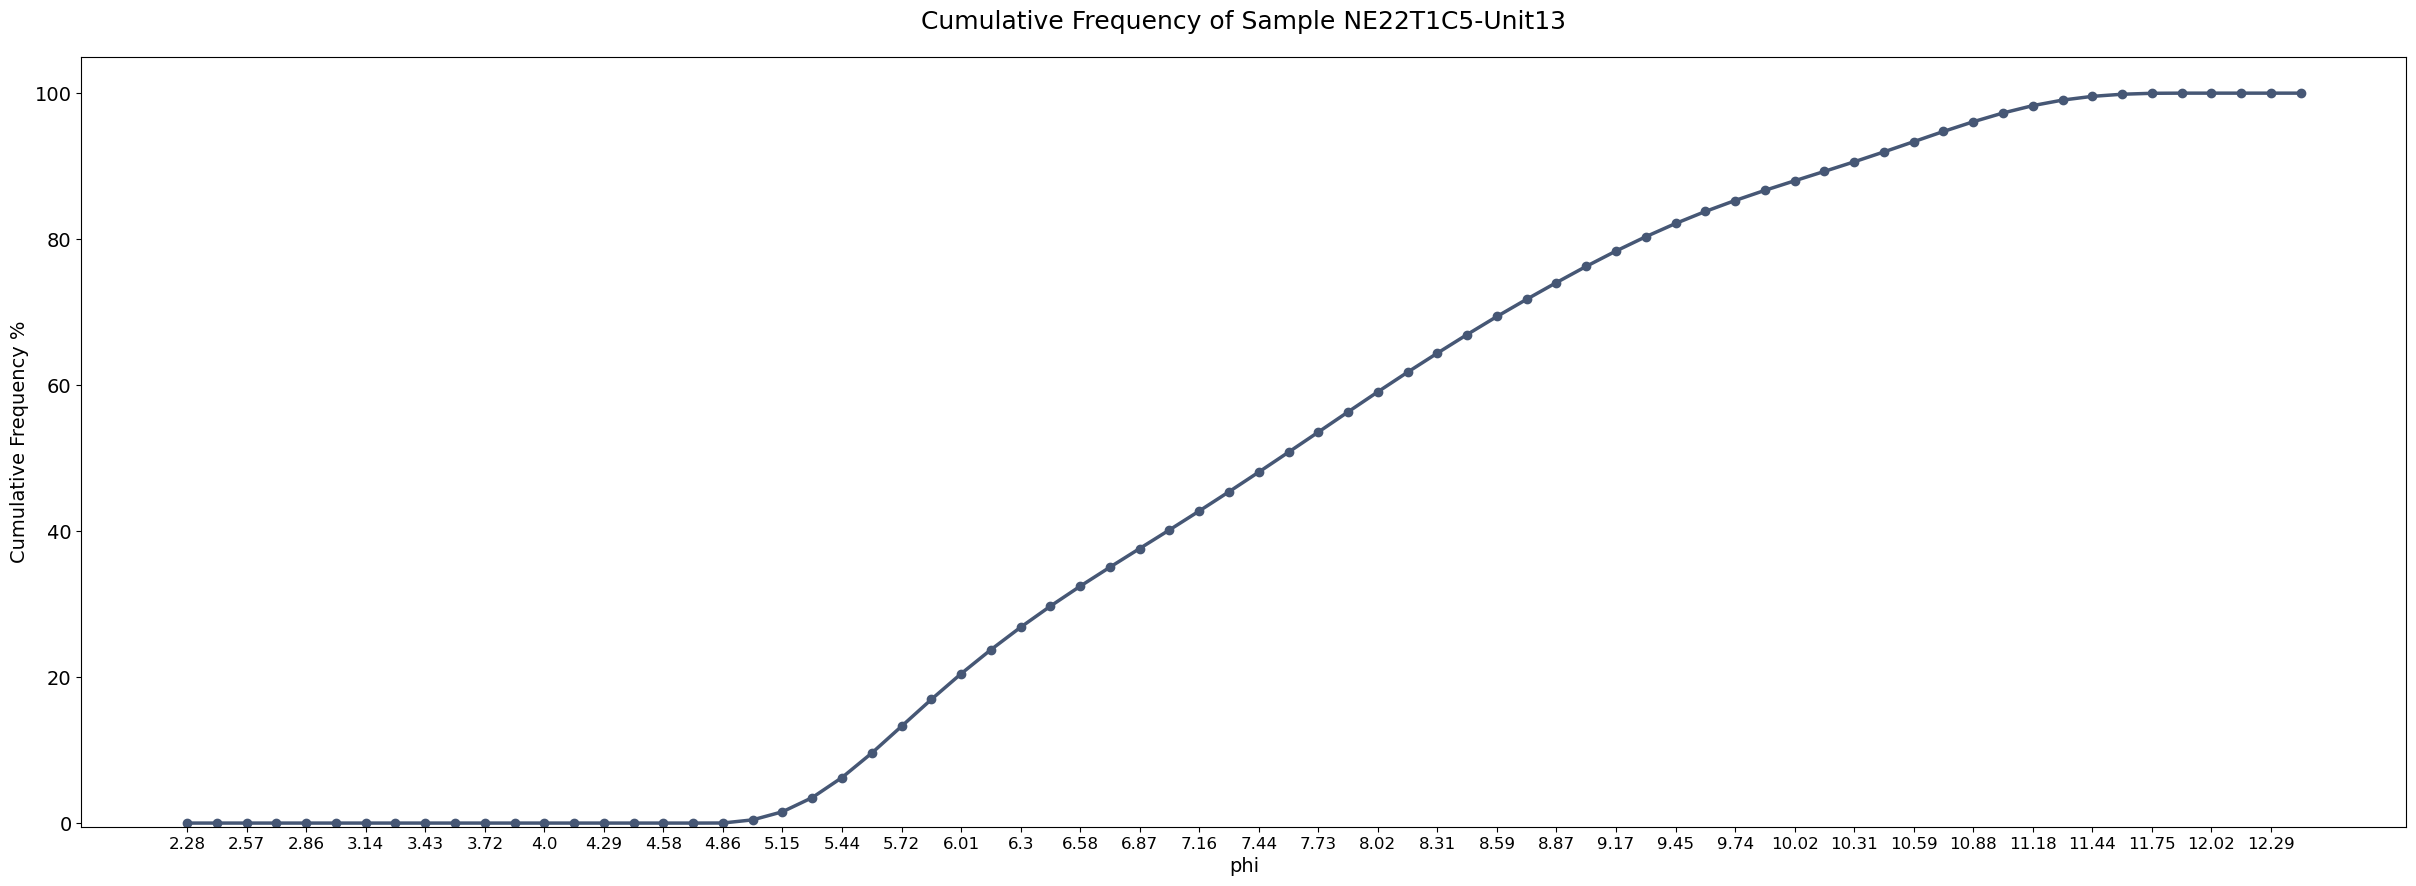

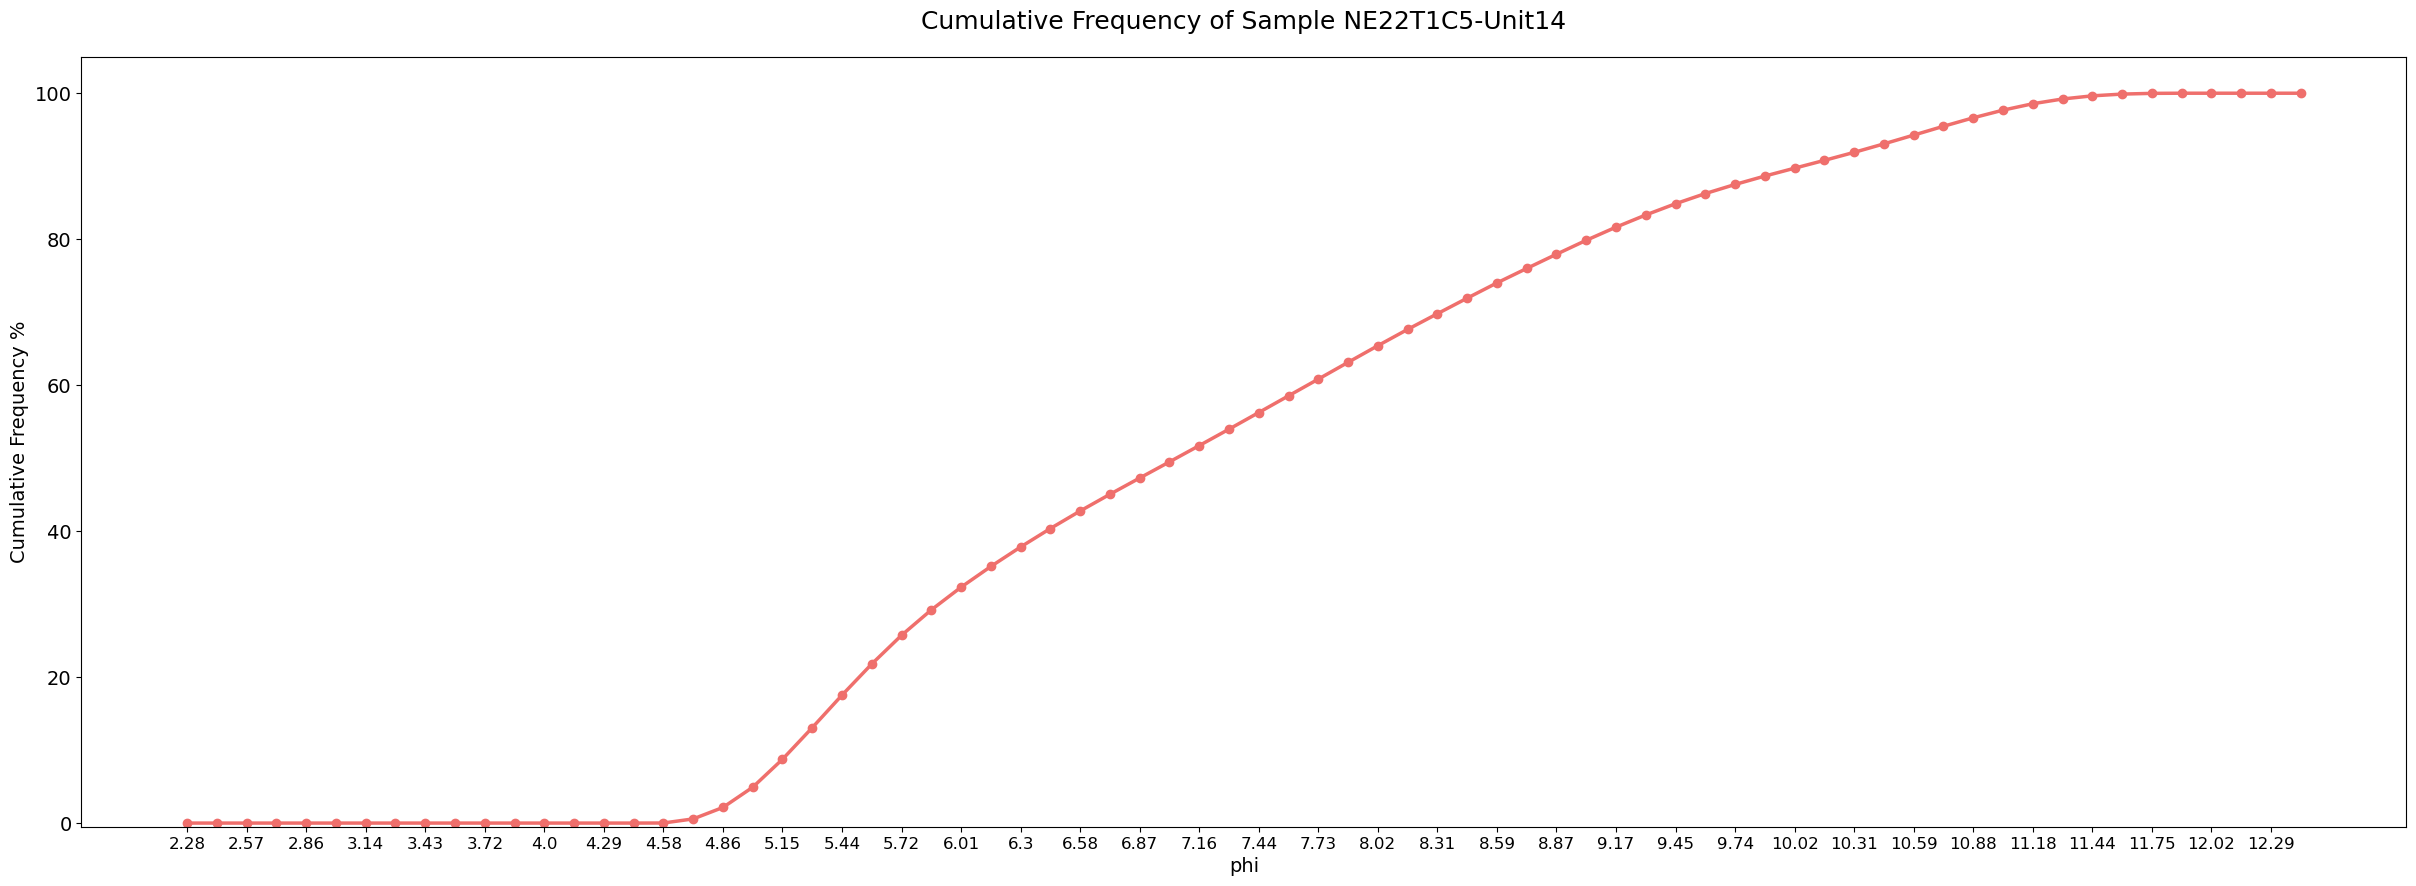

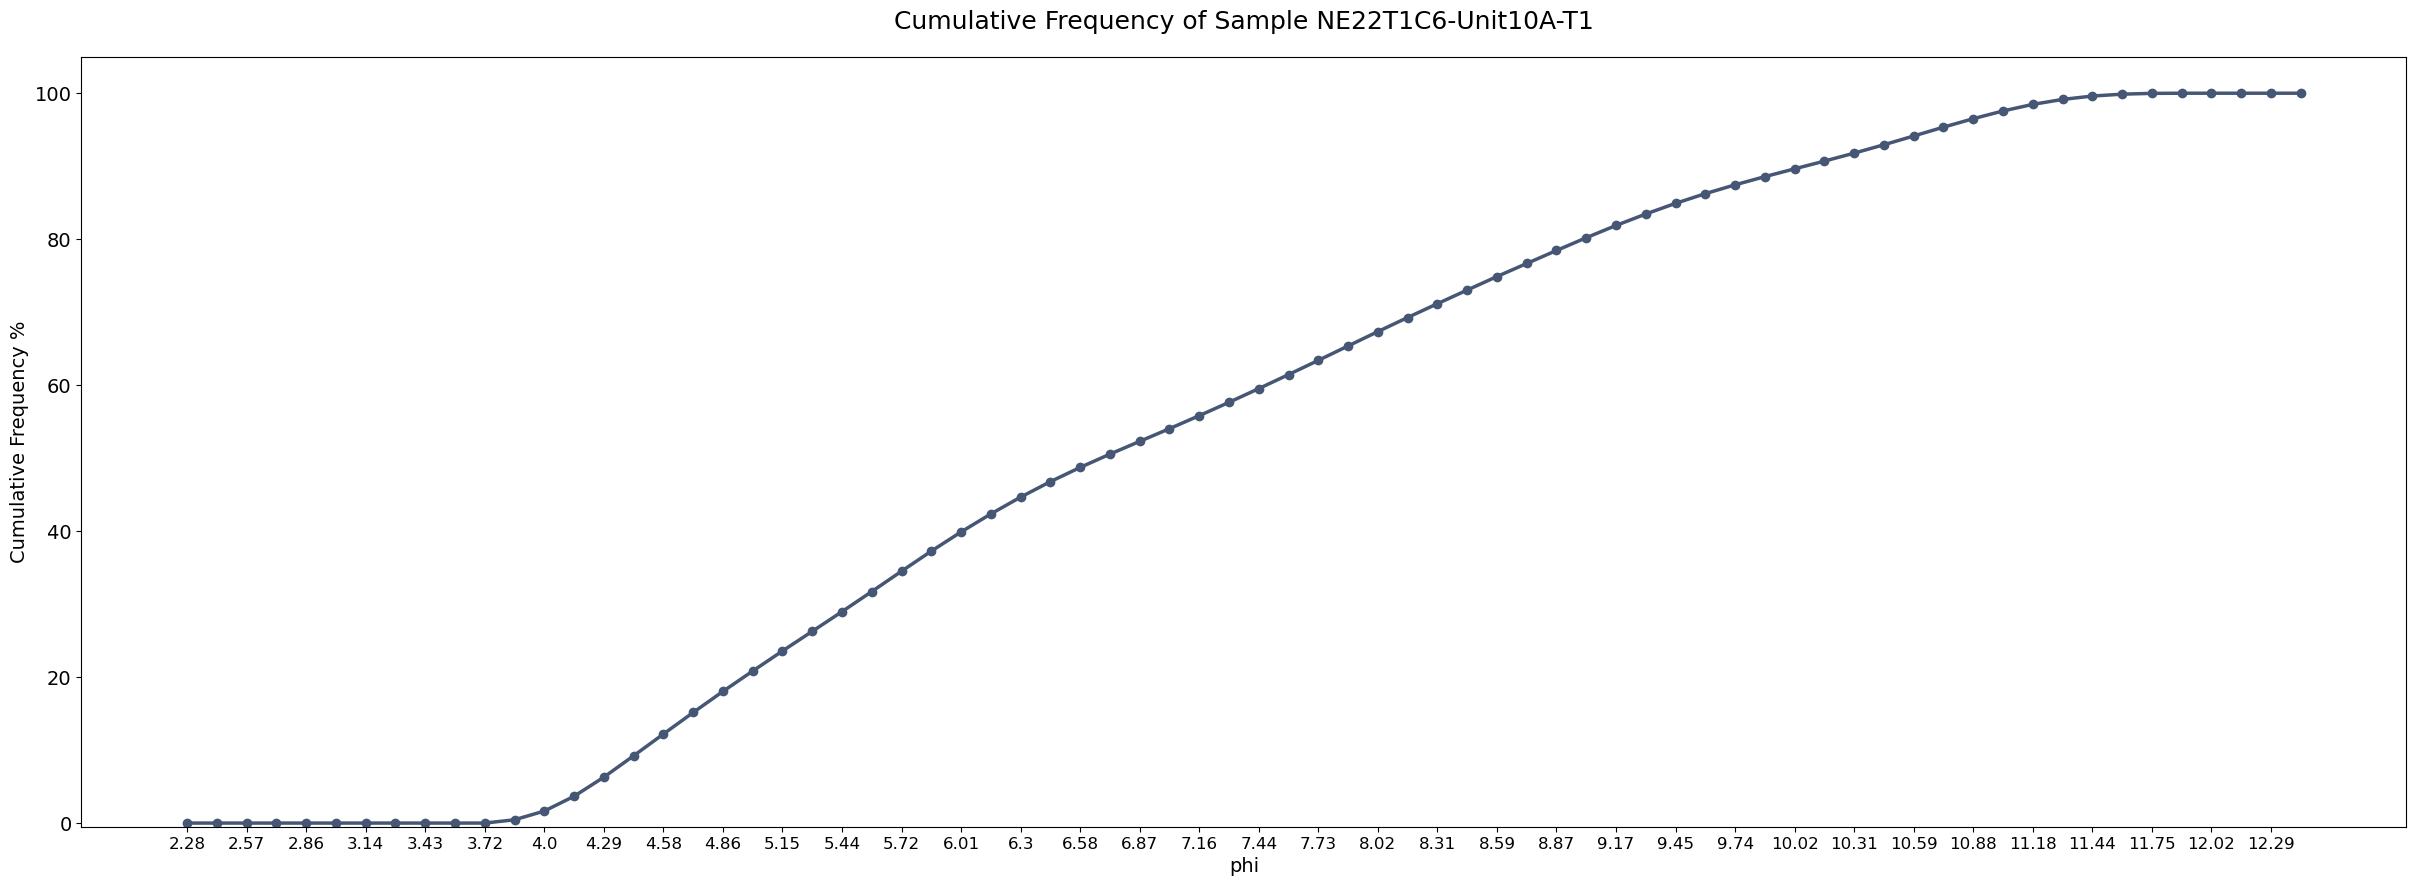

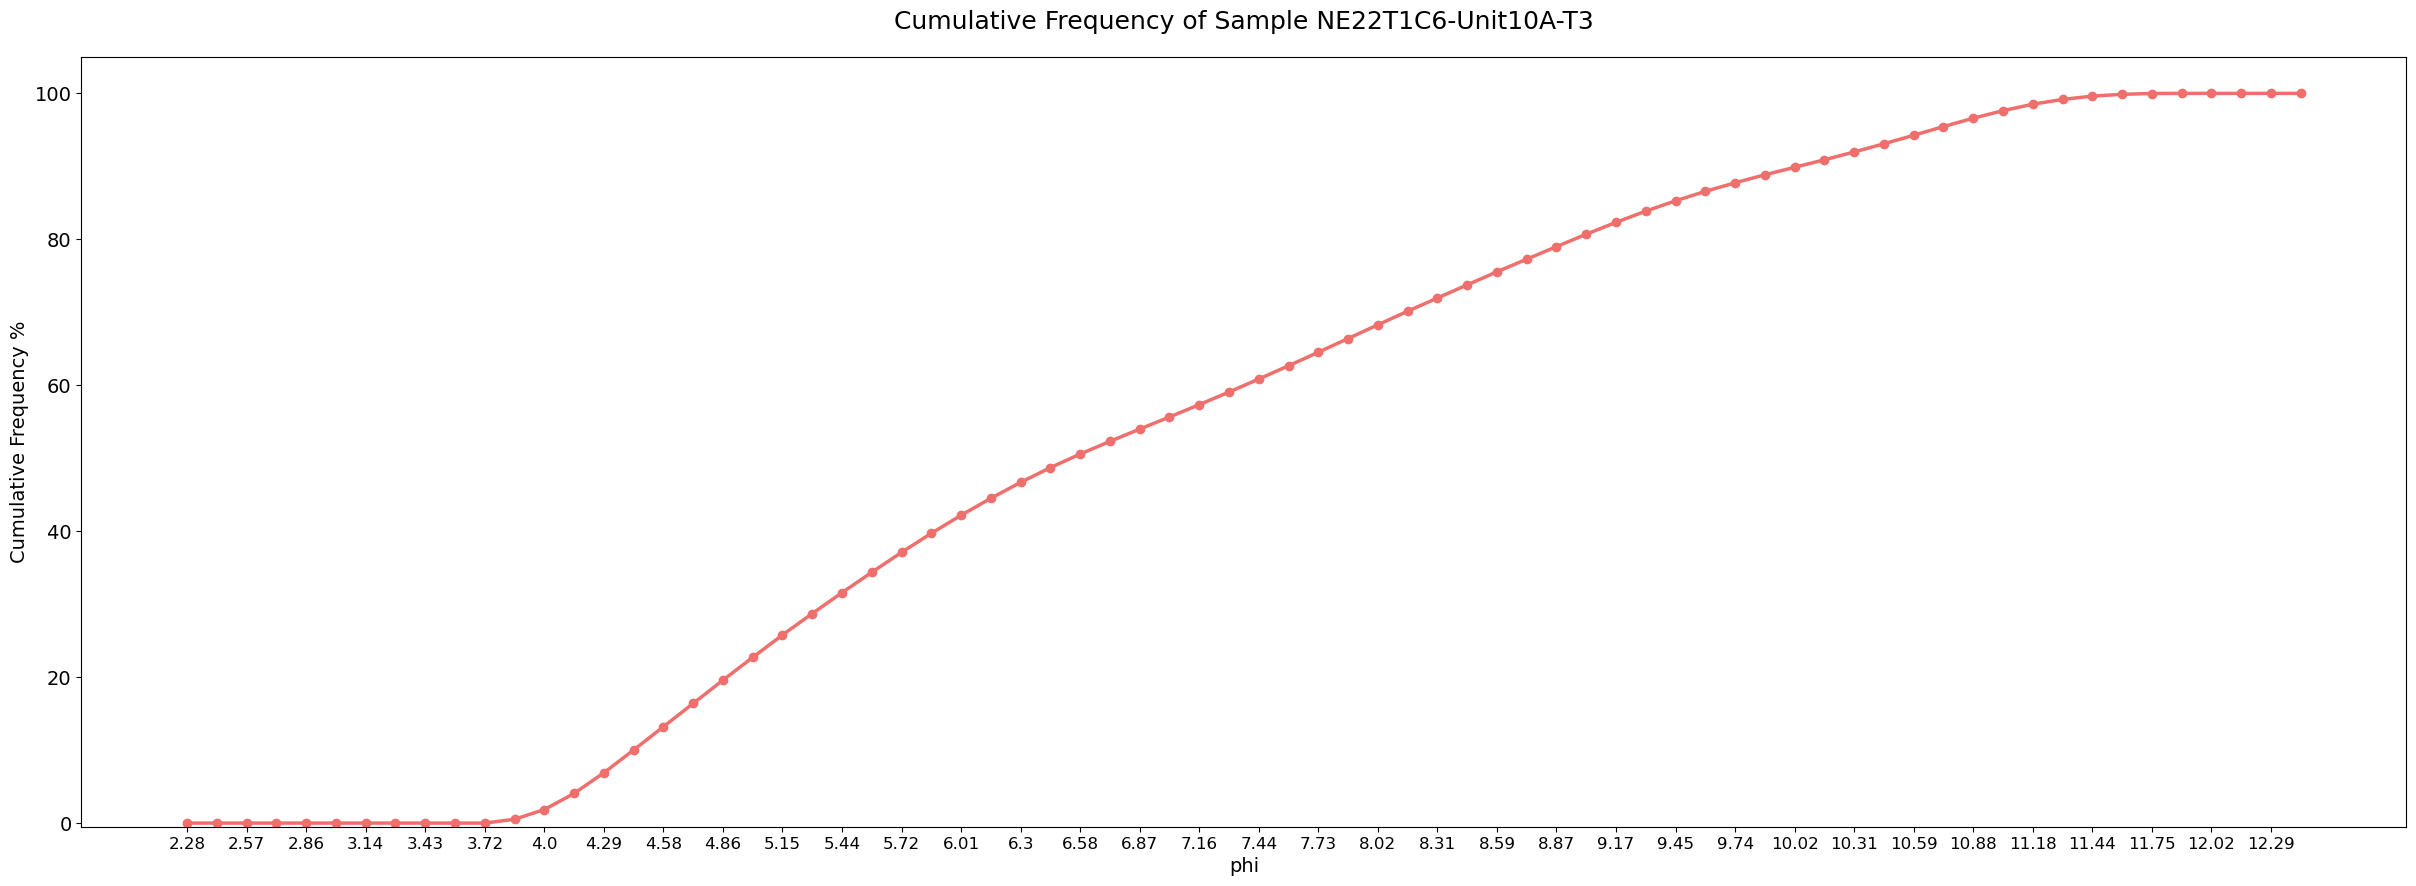

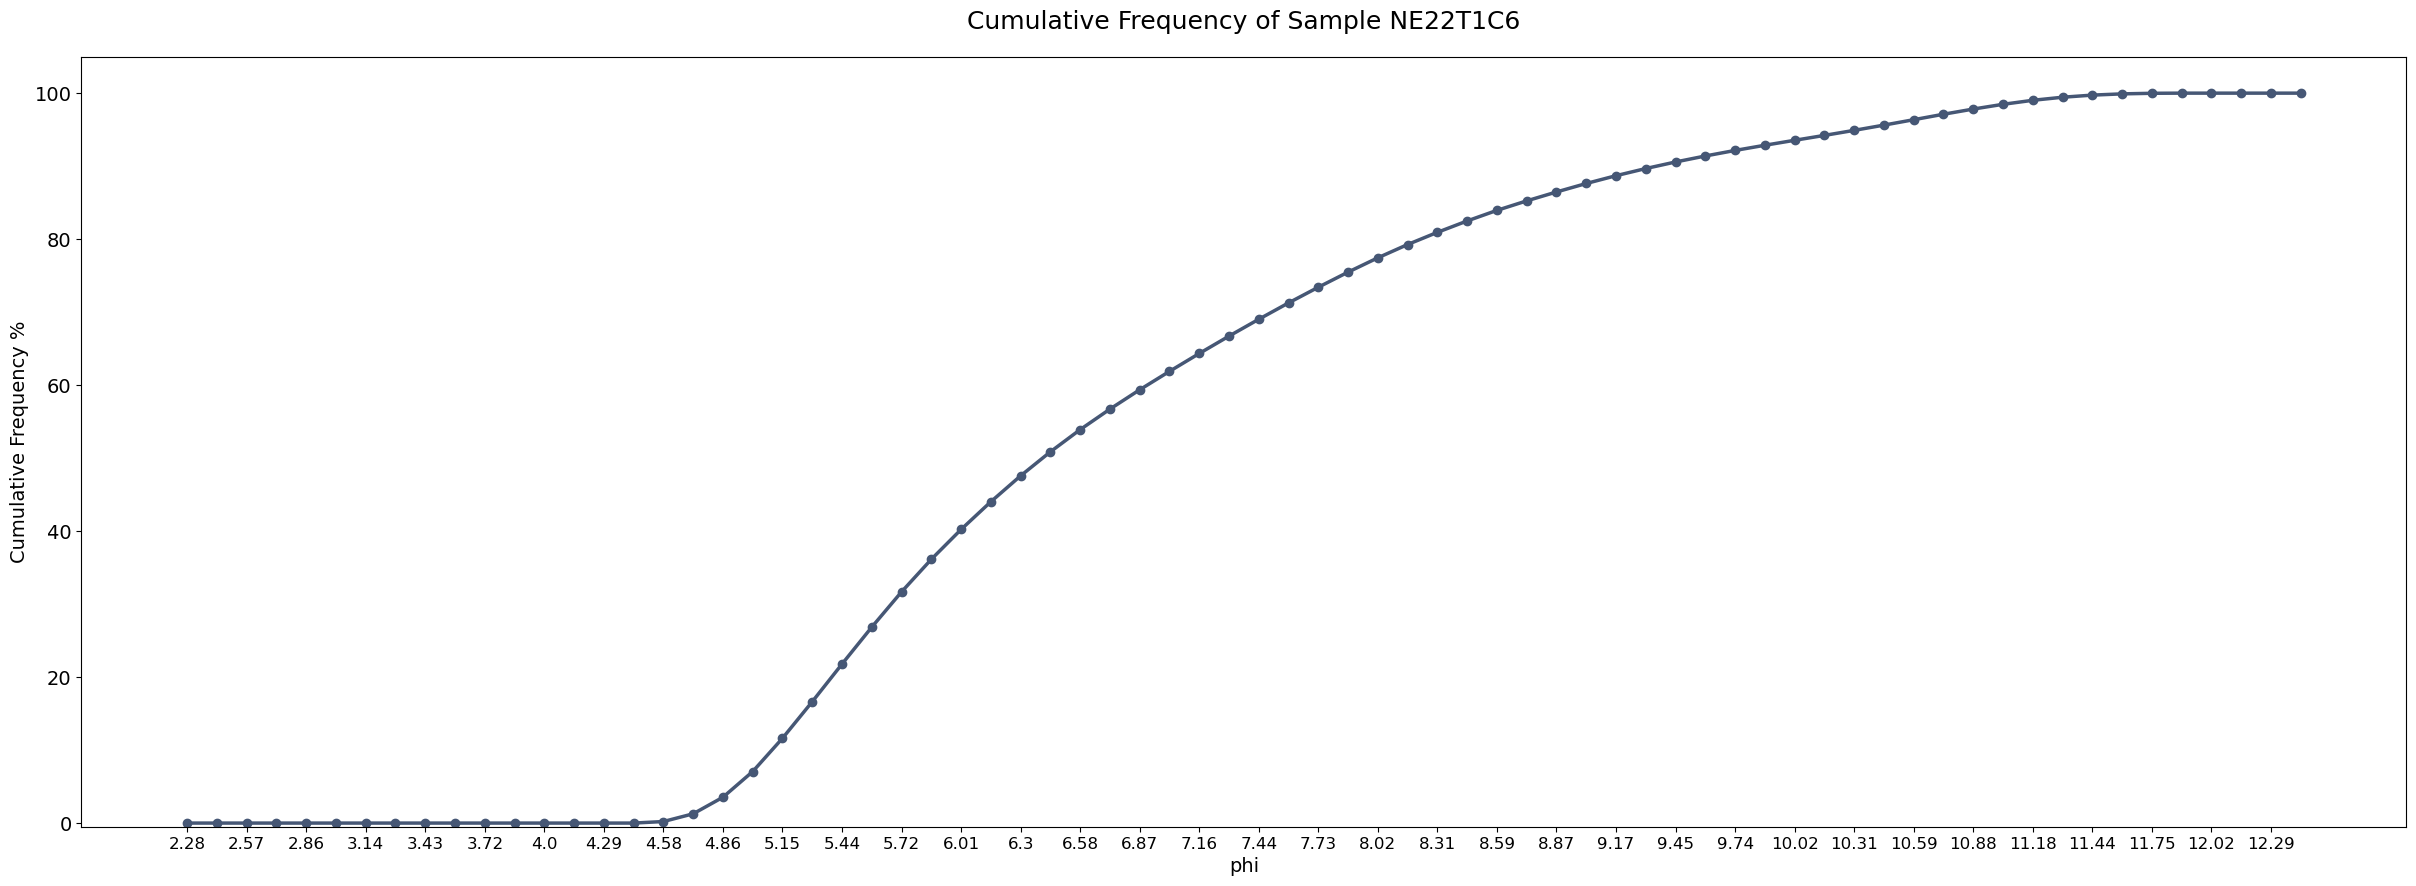

In [15]:
# Call the function to create the figures
cumulativeCurve(allFreq, 0, 7, 30, 10) #cumulative curves of grain sizes in samples 1-7